![](http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png)

In [4]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [16]:
# 导入提供的数据
midwest = pd.read_csv("data/midwest_filter.csv")

In [9]:
# 设置各种属性
large = 22
med = 16
small = 12

params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

In [4]:
# 准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]


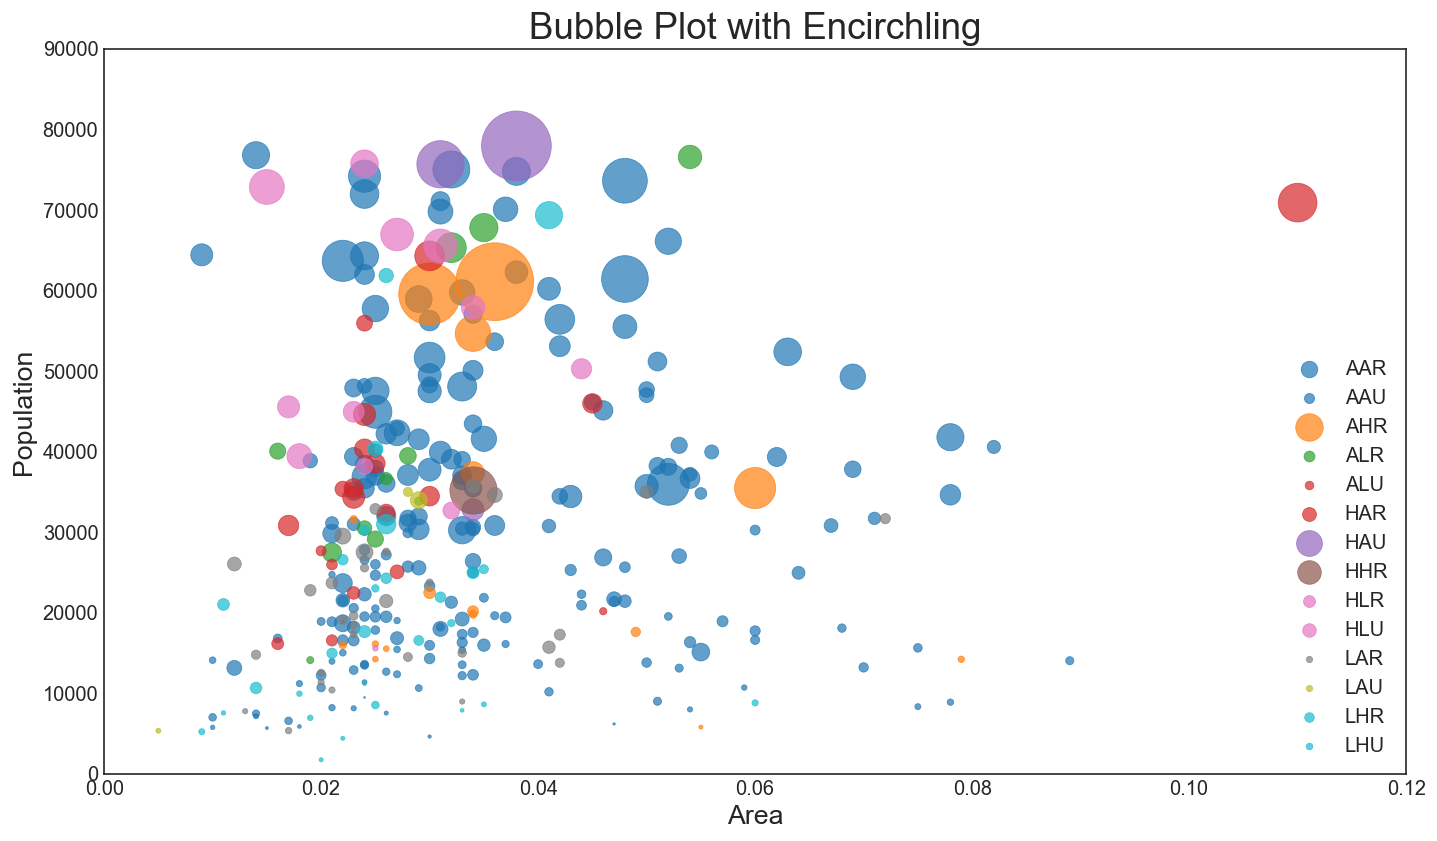

In [5]:
# 设置画布
fig = plt.figure(
    figsize=(14,8)
    ,dpi=120
    ,facecolor='w'
    ,edgecolor='k'
)

# 气泡图只需要改变S参数的大小即可，一般可将其与其他值联系
for i,category in enumerate(categories):
    plt.scatter(
        'area'
        ,'poptotal'
        ,data = midwest.loc[midwest.category == category, :] 
        ,s = 'popasian'   # 亚洲人口数量作为气泡图大小
        # ,s = midwest.loc[midwest.category == category, 'percasian']* 500    # 亚洲人口比例作为气泡图大小，并做调整
        ,c = np.array(colors[i]).reshape(1,-1)
        ,label = str(category)
        # ,edgecolors='k' # 在这里是点的边框颜色，不设置默认与c相同
        ,alpha=0.7  # 透明度防遮挡
        ,linewidths=0.5 #点外圈线条的宽度
    )

# 其他方面的装饰
plt.gca().set(
    xlim = (0.0,0.12)
    ,ylim=(0,90000)
    ,xlabel = 'Area'
    ,ylabel = 'Population'
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encirchling", fontsize=22)
plt.legend(
    fontsize=12
    ,markerscale = 0.5  # 现有气泡图的比例
)
plt.show()

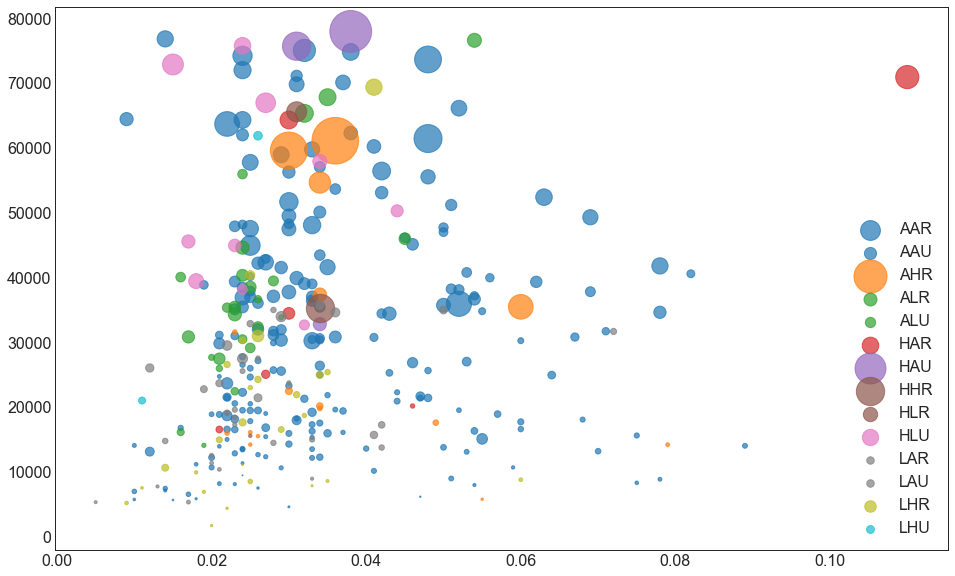

In [10]:
# 使用另一种循环方式
plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(
        midwest.loc[midwest['category'] == categories[i], 'area']
        ,midwest.loc[midwest['category'] == categories[i],'poptotal']
        ,s = midwest.loc[midwest['category']==categories[i],'popasian']
        ,c = np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
        ,alpha=0.7
        ,label = categories[i]
    )

plt.legend()
plt.show()

### 气泡图中 s 存在的陷阱
s 的长度会对图像有什么影响？<br>
与老版本不同，新版本中s的长度必须与元素长度一致

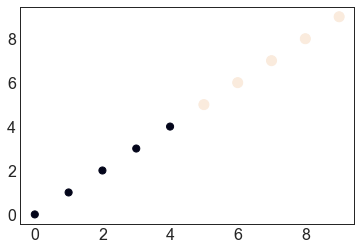

In [11]:
X = np.arange(0,10,1)
y = [0,0,0,0,0,1,1,1,1,1]
size1 = [50,50,50,50,50,100,100,100,100,100]
# 长度刚好：正常显示大小
plt.scatter(X,X
            ,s  = size1
            ,c = y
            )
plt.show()

In [12]:
size2 = [50,50,50,50,50,100,100,100,100,100,200,200,200,200,200]
# 长度比元素长：报错
plt.scatter(X,X
            ,s  = size2
            ,c = y
            )
plt.show()

ValueError: s must be a scalar, or the same size as x and y

In [13]:
size3 = [50,100,200]
# 长度比元素短：报错
plt.scatter(X,X
            ,s  = size3
            ,c = y
            )
plt.show()

ValueError: s must be a scalar, or the same size as x and y

![](http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png)

## 给气泡图加上文字

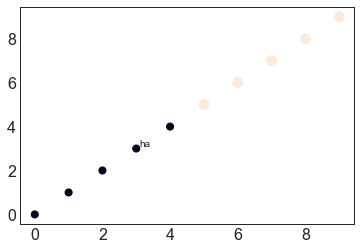

In [6]:
# 加文字用的方法是plt.text，一次只能为一个气泡加上一个文字
# 所以前两个的参数分别是横坐标和纵坐标
X = np.arange(0,10,1)
y = [0,0,0,0,0,1,1,1,1,1]
size1 = [50,50,50,50,50,100,100,100,100,100]
plt.scatter(X,X
            ,s=size1
            ,c=y
            )
plt.text(
    X[3]+0.1
    ,X[3]+0.1
    ,s='ha'
)
plt.show()

#### 实战Midwest数据集

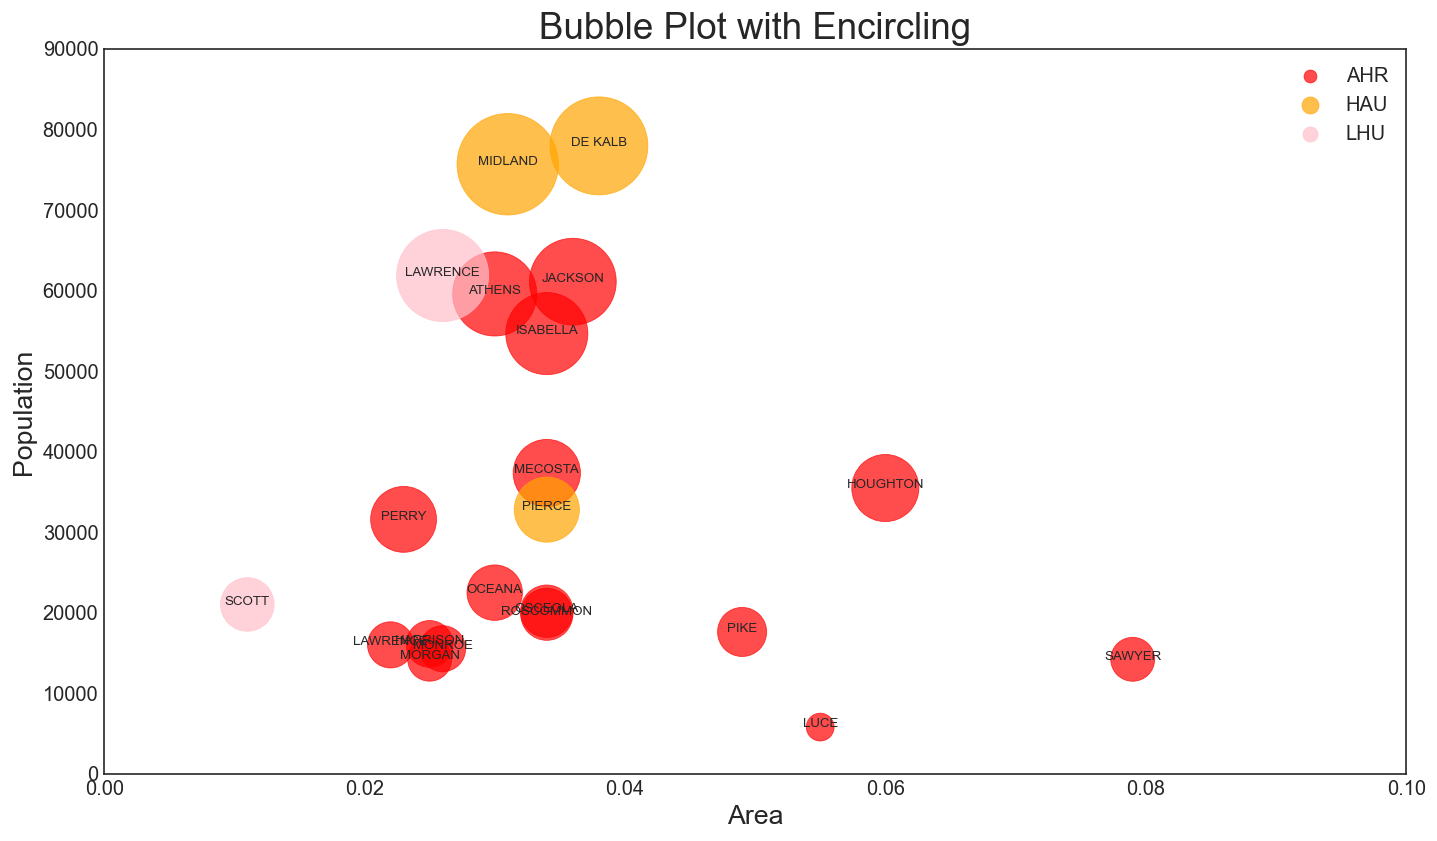

In [12]:
# 准备标签列表
categories = np.unique(midwest.category)
colors = ['red','orange','pink']

fig = plt.figure(figsize=(14,8),dpi=120,facecolor='w',edgecolor='k')

# 循环绘图
for i, category in enumerate(['AHR','HAU','LHU']):
    data_ = midwest.loc[midwest.category == category,:]
    data_.index = range(data_.shape[0]) #之后会用到索引作为文字位置，所以重置索引
    plt.scatter(
        'area'
        ,'poptotal'
        ,data=data_
        ,s = midwest.loc[midwest.category == category,'poppovertyknown'] * 0.05
        ,c=colors[i]
        ,label = str(category)
        ,edgecolors=colors[i]
        ,alpha=0.7
        ,linewidths = 0.5
    )

    for i in range(midwest.loc[midwest.category == category,:].shape[0]):
        plt.text(
            data_.loc[i,'area']
            ,data_.loc[i,'poptotal']
            ,s=data_.loc[i, 'county']
            # ,fontdict={'fontsize':8}
            ,fontdict={'fontsize':8}
            ,horizontalalignment='center'
        )
plt.gca().set(xlim=(0.0, 0.1),ylim=(0,90000),xlabel='Area',ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Bubble Plot with Encircling', fontsize=22)
plt.legend(fontsize=12, markerscale=0.2)
plt.show()

![](http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png)

## 散点图框成凸包

画凸包需要用到Scipy中的spatial模块

scipy.spatial.ConvexHull()

可以建立N维凸包

#### 重要参数

**points：**浮点数组成的n维数组，结构为(点的个数，维度)。表示用来构成凸包的坐标点。

**incremental：**布尔值，可不填。允许不断向类中添加新的数据点。

#### 重要属性

**vertices：**组成凸包的那些数据点在原数据中的索引

*更多参数和属性参考：https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.ConvexHull.html

In [8]:
from scipy.spatial import ConvexHull
from matplotlib import patches
# patches，给现有的图像打补丁的包，在现有图像的基础上增加更多的东西

In [9]:
# 定义绘制凸包的函数
def encircle(x,y,ax=None,**kw):
    '''
    x,y:要框起来的点
    ax：子图对象
    **kw:用于调节多边形样式的参数
    '''
    # 获取现在的子图，如果没有则创建一个
    if not ax:
        ax = plt.gca()
    # p是所有的点
    p = np.c_[x,y]  # 类似zip，将两列数生成二维数组
    hull = ConvexHull(p)    # ConvexHull参数是二维数组，返回凸包类型的对象
    # hull.vertices是构成凸包点的索引
    # 进行切片后，利用绘制多边形的类plt.Polygon将形成凸包的点连起来
    # **kw是调节多边形样式的参数
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    # 将生成的多边形作为一个补丁补充到图像上
    ax.add_patch(poly)


In [10]:
# 测试数据
import numpy as np 
np.random.seed(1)   # 设置随机种子，以便随机数在多次运行结果相同

# np.random.randn 符合标准正态分布的随机数
# np.random.normal 符合正态分布的随机数
x1,y1 = np.random.normal(
                        loc=5 # 均值
                        , scale=2 # 方差
                        , size=(2,15) # 生成什么数据，2列，每列15个
                    )

In [13]:
x2,y2 = np.random.normal(loc=8, scale=2.5, size=(2,13))

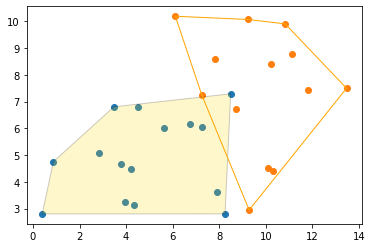

In [15]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)

encircle(
    x1, y1
    , ec='k' # 线条的颜色
    , fc='gold' # 多边形的yans
    , alpha=0.2 # 多边形透明度
)

encircle(x2,y2
        , ec='orange'
        , fc='none' # 设置为none表示多边形内部为透明
    )

plt.show()

### 博客中的原始图

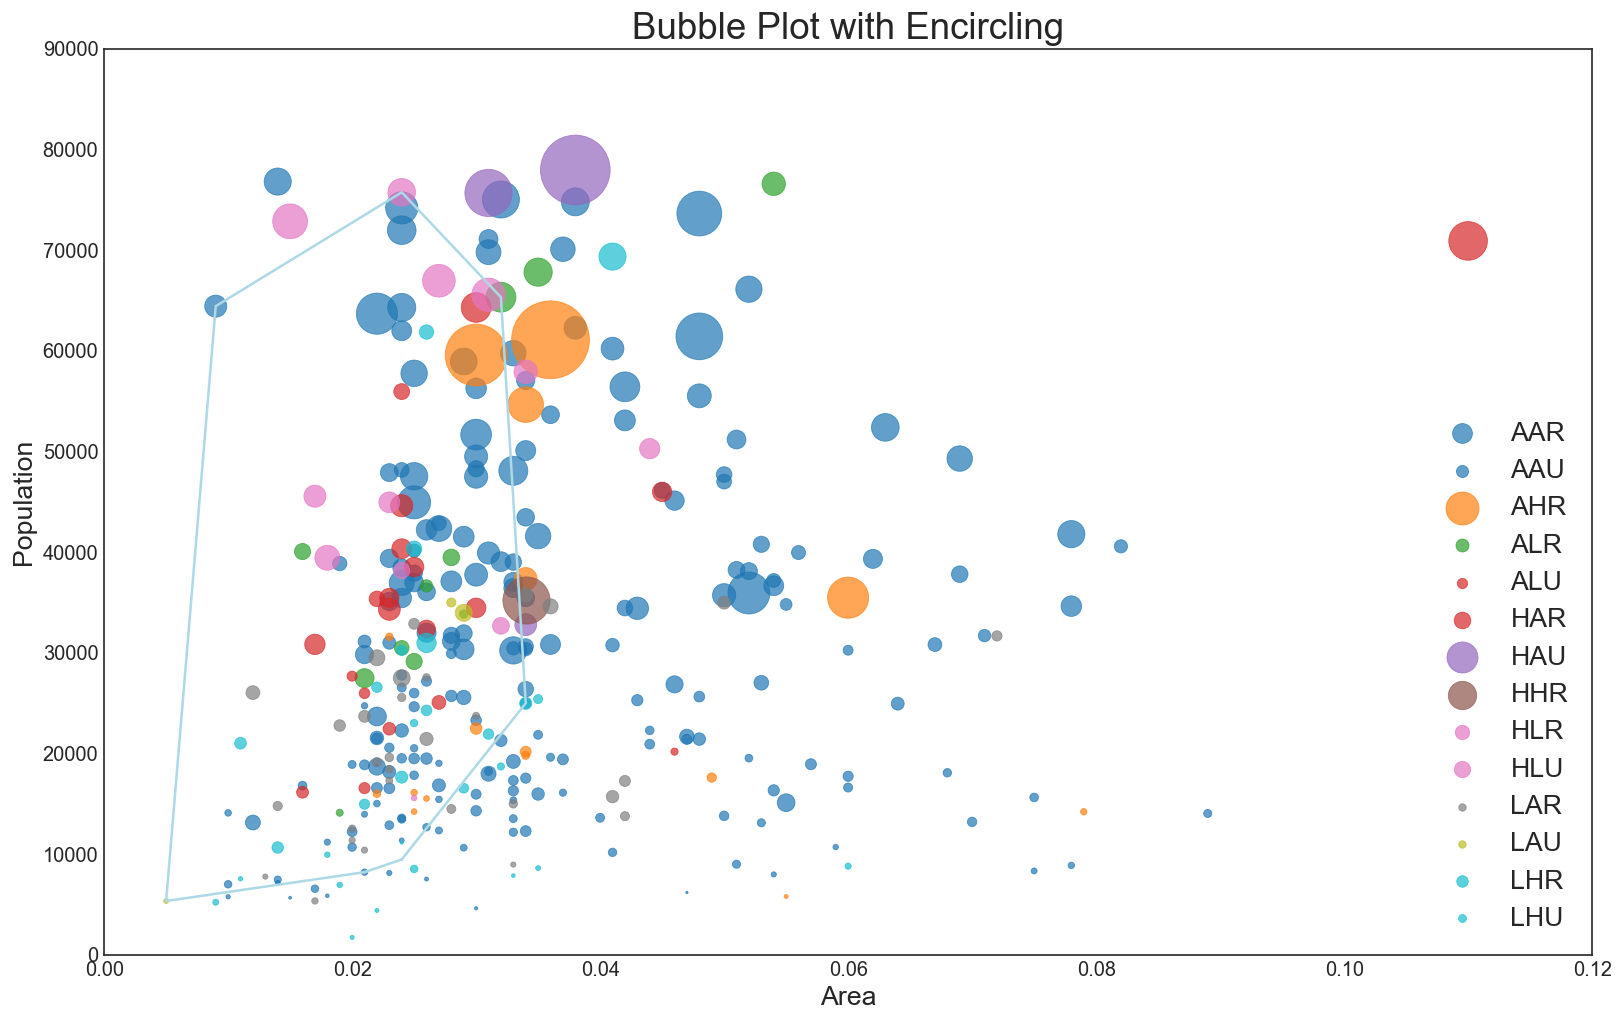

In [19]:
from scipy.spatial import ConvexHull
from matplotlib import patches

plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize=(16, 10), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
                , s="popasian" #调整尺寸，让散点图成为气泡图
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors= np.array(colors[i]).reshape(1,-1)
                , alpha = 0.7
                , linewidths=.5)

# 绘制凸包
# 定义函数
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# 定义需要被框起来的数据：所有在IN州中的城市
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

# 绘制, 金色的面
# encircle(midwest_encircle_data.area
#          , midwest_encircle_data.poptotal
#          , ec='k'
#          , fc='gold'
#          , alpha=0.1
#          )
# 绘制，浅蓝色的线，透明的面
encircle(midwest_encircle_data.area
         , midwest_encircle_data.poptotal
         , ec='lightblue'
         , fc='none'
         , linewidth=1.5 # 线宽
         )

plt.gca().set(xlim=(0.0, 0.12)
              , ylim=(0, 90000)
              , xlabel = 'Area'
              , ylabel = 'Population'
             )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Bubble Plot with Encircling', fontsize=22)
plt.legend(markerscale=0.6)
plt.show()